# Self Learning Chatbot
Using python and tensorflow to apply a LSTM model.

Rule based chatbot:
Essentialy takes input and based on the input it generates the output based on the set of rules specified by the programmer eg. menu based bots in swiggy etc.

Self learning chatbots:
Apart from the data it is trained on it is also capable of answering unexpected questions as it uses machie learning algorithms.


In [1]:
#importing the necessary libraries 
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Input,Embedding,LSTM, Dense,GlobalMaxPooling1D,Flatten
from keras.models import Model


# Importing the dataset
We can save the data in the form of a json file which is imported using pandas framework.
Keras helps us deal with neural network working of a small amount of data.


In [3]:
#importing the dataset
with open('content.json') as content:
    data1=json.load(content)

In [4]:
#converting data to lists
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
    responses[intent['tag']]=intent ['responses']
    for lines in intent ['patterns']:
        inputs.append(lines)
        tags.append(intent['tag'])


In [5]:
#converting to dataframe
data=pd.DataFrame({"inputs":inputs, "tags":tags})

In [6]:
#printing the data
data.head()

,inputs,tags
0,google,google
1,search,google
2,internet,google
3,Hi there,greeting
4,How are you,greeting


In [7]:
# Pandas sample() is used to generate a sample random row or column from the function caller data frame.
data = data.sample(frac=1)

# Pre-Processing the data

We remove punctuations, convert to lowercase, and encode the textual data to numerical data as the machine doesnt understand text it only understands numerical values here.

In [8]:
#removing punctuations
import string
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
data


,inputs,tags
60,i know,exclaim
25,what help you provide,options
32,what are you,Identity
21,awesome thanks,thanks
61,ok,exclaim
...,...,...
39,what day is is today,datetime
71,good talk,nice
58,awesome,exclaim
24,what you can do,options


# Tokenizing the data

Tokenization is the task of chopping text up into pieces, called tokens, and at the same time throwing away certain characters, such as punctuation. These tokens are linguistically representative of the text.
I referred to the given article for better understanding on tokenizer-
https://medium.com/analytics-vidhya/understanding-nlp-keras-tokenizer-class-arguments-with-example-551c100f0cbd

In [9]:
#tokenize the data
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000) #size of vocab
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

#apply padding
from keras.utils import pad_sequences
x_train= pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(data['tags'])


The tokenizer assigns a unique token to each distinct word and padding is added to all data before sending it to the rnn layer.

In [10]:
input_shape= x_train.shape[1]
print(input_shape)


6


In [11]:
#define vocabulary
vocabulary= len(tokenizer.word_index)
print("no of unique words is: ",vocabulary)
output_length= le.classes_.shape[0]
print("output length:",output_length)

no of unique words is:  116
output length: 27


# Neural network

The network has an embedding layer it is an important part of NLP (Natural Language Processing) the outputs of embedding layer are fed as the input of recurrent layer with LSTM gate.
LSTM refers to Longest Short Term Memory, it provides the recurrent neural network the ability to remember and forget selected data and help make the whole model more effecient.

In [12]:
#creating the model
i= Input(shape=(input_shape,))
x= Embedding(vocabulary + 1, 10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation="softmax")(x)
model= Model(i,x)

In [13]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [14]:
#training the model
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
4/4 [==============================] - 2s 6ms/step - loss: 3.2961 - accuracy: 0.0300
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 3.2929 - accuracy: 0.1200
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 3.2902 - accuracy: 0.1200
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 3.2879 - accuracy: 0.1000
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 3.2857 - accuracy: 0.1100
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 3.2833 - accuracy: 0.1200
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 3.2804 - accuracy: 0.1200
Epoch 8/200
4/4 [==============================] - 0s 4ms/step - loss: 3.2777 - accuracy: 0.1200
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 3.2748 - accuracy: 0.1500
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 3.2719 - accuracy: 0.1900
Epoch 11/200
4/4 [===========

# Analyzing the model


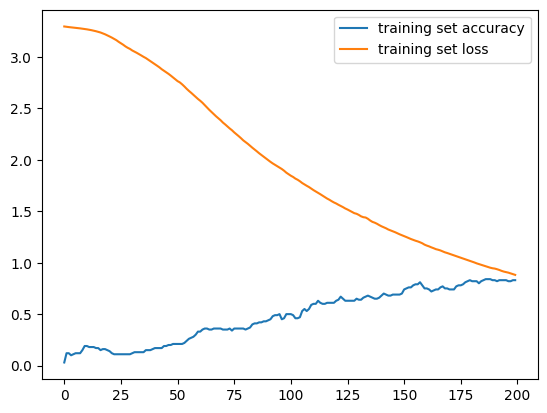

In [15]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

# Testing the model

In [17]:
#to chat with the user
import random

while True:
    texts_p= []
    prediction_input= input('You:')

    #removing punctuations and converting to lowercase
    prediction_input =  [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input=''.join(prediction_input)
    texts_p.append(prediction_input)


    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)


    #getting output from model
    output = model.predict(prediction_input)
    output=output.argmax()

    #finding the right tag and predicting
    response_tag= le.inverse_transform([output])[0]
    print("chatbot: ",random.choice(responses[response_tag]))
    if response_tag== "goodbye":
        break


1/1 [==============================] - 0s 27ms/step
chatbot:  Good to see you again
1/1 [==============================] - 0s 26ms/step
chatbot:  I am a Deep-Learning chatbot
1/1 [==============================] - 0s 22ms/step
chatbot:  See you!
